<a href="https://colab.research.google.com/github/Sang555/ece228/blob/main/Copy_of_Copy_of_228_hariprasad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
%matplotlib inline



In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/Sang555/ece228/main/atlantic.csv")
data.head(3)

In [ ]:
!pip3 install update pandas==0.25.3

In [ ]:
len(data.ID.unique())

In [ ]:
data.groupby(by=["ID"]).Name.count()

In [ ]:
data.groupby(by=["ID"]).Name.count().max()

In [ ]:
data.describe()

In [ ]:
data.isnull().sum(axis = 0)

In [ ]:
data['Latitude1'] = data['Latitude'].str[:-1]
data['Latitudesign'] = data['Latitude'].str[-1]
data['Longitude1'] = data['Longitude'].str[:-1]
max(data['Longitude1'])
#data.head(5)


In [ ]:
!wget https://raw.githubusercontent.com/Sang555/ece228/main/lambert.py
!wget https://github.com/Sang555/ece228/blob/main/projection_constants.json

In [ ]:
#@title
import numpy as np
import pandas as pd
import json
import httpimport
#import https://raw.githubusercontent.com/Sang555/ece228/main/lambert.py?token=GHSAT0AAAAAABR2ACEM3YMSPDKAFI6FULWMYTPLGCA
from lambert import Lambert
#with open('projection_constants.json', 'r') as f: 
 # const = json.load(f)
# Test if our custom implementation of Lambert projection yields same results as Cartopy:


# data['Latitude1'] = data['Latitude'].map(lambda x: float(str(x)[:-3]))
# data['Longitude1'] = data['Longitude'].map(lambda x: float(str(x)[:-3]))
data['Latitude1'] = pd.to_numeric(data['Latitude1'])
data['Longitude1'] = pd.to_numeric(data['Longitude1'])
lat_true = data['Latitude1']
lon_true = data['Longitude1']

lamb = Lambert(
    standard_parallels=(33, 45),
    central_latitude=0, central_longitude=0,
    false_easting=400000, false_northing=400000,
    semimajor_axis = 6377397.155, inverse_flattening = 299.1528153513275
)

x_test, y_test = lamb.geographic2cartesian(lat_true, lon_true)
data['lcc_x'] = x_test
data['lcc_y'] = y_test
# print('Forward direction - largest absolute errors: x = {}, y = {}'.format(np.max(np.abs(x_test-x_true)), np.max(np.abs(y_test-y_true))))

# lat_test, lon_test = lamb.cartesian2geographic(x_true, y_true)
# print('Backward direction - largest absolute errors: lat = {}, lon = {}'.format(np.max(np.abs(lat_test-lat_true)), np.max(np.abs(lon_test-lon_true))))



In [ ]:

data['difference_lat'] = data.groupby('ID')['Latitude1'].diff()
data['difference_lon'] = data.groupby('ID')['Longitude1'].diff()
data['trans_dir'] = np.arctan(data['difference_lat']/data['difference_lon'])

In [ ]:
data.head(5)

In [ ]:
def haversine(coord1: object, coord2: object, lat2: object, lon2: object):
    import math

    # # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    # lon1, lat1 = coord1
    # lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat2 - coord1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(coord1)
    delta_lambda = math.radians(coord2)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)/(6*3600)
    return meters



In [ ]:
data['trans_speed'] = data.apply(lambda x: haversine(x['difference_lat'],x['difference_lon'],x['Latitude1'],x['Longitude1']), axis=1)
data.head(5)

In [ ]:
max(data['trans_speed'][1:])

In [ ]:

from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data['trans_speed'], bins = range(0,44,2))
 
# Show plot
plt.show()

In [ ]:
clean =  data['Longitude1']>=-180
data3 = data[clean]


In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data3['Longitude1'], bins = range(-150,100,5))
 
# Show plot
plt.show()
min(data3['Longitude1'])

In [ ]:
data2 = data.groupby('ID').filter(lambda x: len(x) > 6)

In [ ]:
max(data2['Longitude1'])

In [ ]:
min(data2['Longitude1'])

In [ ]:
is_359 =  data2['Longitude1']<-109.5
data_359 = data2[is_359]
print(data_359)

In [ ]:
a2


In [ ]:
a1 = lamb.geographic2cartesian(7.4, 109.5)
a2 = lamb.geographic2cartesian(81, 109.5)
a3 = lamb.geographic2cartesian(7.4, 63)
a4 = lamb.geographic2cartesian(81, 63)

print("a1",a1);
print("a2",a2);
print("a3",a3);
print("a4",a4);
plt.scatter(a1[0],a1[1],color='red')
plt.scatter(a2[0],a2[1],color='blue')
plt.scatter(a3[0],a3[1],color='green')
plt.scatter(a4[0],a4[1],color='pink')

d1=math.sqrt((a2[0]-a3[0])**2+(a2[1]-a3[1])**2);
d2=math.sqrt((a1[0]-a3[0])**2+(a2[1]-a3[1])**2);
area_gridspace = 0.5*d1*d2
print(area_gridspace,d1,d2)
step_size=math.sqrt(area_gridspace)/60;
step_size

In [ ]:
storm_cnt_mat=np.zeros([60,60])
print(storm_cnt_mat.shape)
import collections
d = collections.defaultdict(dict)

In [ ]:
data2['col'] = (data2['lcc_x']-11121468.95094128)/step_size
data2['col'] = data2['col'].apply(np.ceil)
data2['row'] = (data2['lcc_y']-8744214.95371708)/step_size
data2['row'] = data2['row'].apply(np.ceil)

In [ ]:
data3 = data2.groupby(['col', 'row']).size().reset_index(name='count')
data3.head(4)
data3.shape

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data3['count'], bins = range(0,100,5))
# Show plot
plt.show()
min(data3['count'])

In [ ]:
data2.columns

In [ ]:
X_points_to_trav = np.ceil((a1[0]-a4[0])/step_size).astype(int);
#Y_points_to_trav = a4[1]-a2[1]/step_size:
print('No of points in X',X_points_to_trav)

Y_points_to_trav=np.ceil((a2[1]-a3[1])/step_size).astype(int);
print('No of points in Y',Y_points_to_trav)

#matrix which contains the count of all the storms 
storm_cnt=np.zeros([X_points_to_trav,Y_points_to_trav])

(48792,)
(48792,)
concat_matrix (48792, 2)
32 75
----><------ (32, 75)


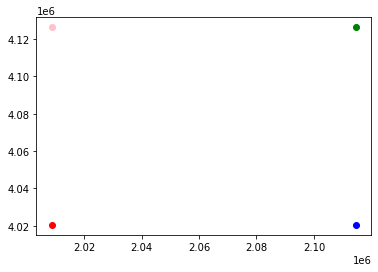

In [41]:
from inspect import EndOfBlock
hurricane_lcc_x = np.array(data2.get('lcc_x'));
hurricane_lcc_y = np.array(data2.get('lcc_y'));
print(hurricane_lcc_x.shape)
print(hurricane_lcc_y.shape)
# array of lcc_x and lcc_y 
# | lcc_x  |  lcc_y  |
# array size = [,2]
concat_mat = np.vstack([hurricane_lcc_x,hurricane_lcc_y]).T 
print("concat_matrix",concat_mat.shape)
np.testing.assert_array_equal(concat_mat.T[0],hurricane_lcc_x, err_msg='array is wrong', verbose=True);

# starting window
a=np.asarray([a4[0],a3[1]]);
b=np.asarray([a4[0]+step_size,a3[1]]);
c=np.asarray([a4[0]+step_size,a3[1]+step_size]);
d=np.asarray([a4[0],a3[1]+step_size]);


plt.scatter(a[0],b[1],color='red')
plt.scatter(b[0],b[1],color='blue')
plt.scatter(c[0],c[1],color='green')
plt.scatter(d[0],d[1],color='pink')

x_axis=0;
y_axis=0;
row= np.ceil((a1[0]-a3[0])/step_size).astype(int);
col = np.ceil((a2[1]-a3[1])/step_size).astype(int);
print(row,col)
displacement_mat = np.zeros((row,col));
print("----><------",displacement_mat.shape)







In [62]:
# Displacement probability loop
i=0;
j=0;

for i in range (Y_points_to_trav):
  print("========== i ======",i)
  for j in range (X_points_to_trav):
      print("========== j ======",j)
      lcc_x_constrained_idx = np.where((concat_mat[0] >= a[0]) & (concat_mat[0] <= b[0]))
      lcc_x_constrained_mat = concat_mat[lcc_x_constrained_idx]
      print("lcc x constrained mat",lcc_x_constrained_mat);
      print("lcc x constrained mat_shape",lcc_x_constrained_mat.shape)
      if lcc_x_constrained_mat.shape[0] != 0:
        lcc_x_constrained_mat_cols=lcc_x_constrained_mat[:,1]
        print("lcc x constrained cols extrac",lcc_x_constrained_mat_cols);
        lcc_y_constrained_idx = np.where( (lcc_x_constrained_mat_cols >= a[1]) & (lcc_x_constrained_mat_cols < d[1]) ) # check y bounds
        print("lcc y",lcc_y_constrained_idx)
        lcc_y_constrained_nd=np.asarray(lcc_y_constrained_idx)
        print("Hari at lab",lcc_y_constrained_nd)
        storm_cnt[j][i]=lcc_y_constrained_nd.shape[1]
        print("storm_cnt",storm_cnt[j][i]);

      a[0] = a[0] + step_size
      b[0] = b[0] + step_size
      c[0] = c[0] + step_size
      d[0] = d[0] + step_size

  a[0] = a4[0];
  a[1] = a[1] + i*step_size;
  b[0] = a4[0]+ i*step_size;
  b[1] = b[1] + i*step_size;
  d[0] = d[0] + i*step_size;
  d[1] = d[1] + i*step_size;


print(storm_cnt.max());


  






Streaming output truncated to the last 5000 lines.
lcc x constrained mat [[8218381.59936213 8295659.86233409]
 [8248290.1530268  8347379.96933981]]
lcc x constrained mat_shape (2, 2)
lcc x constrained cols extrac [8295659.86233409 8347379.96933981]
lcc y (array([], dtype=int64),)
Hari at lab []
storm_cnt 0.0
========== j ====== 7
lcc x constrained mat [[8218381.59936213 8295659.86233409]
 [8248290.1530268  8347379.96933981]]
lcc x constrained mat_shape (2, 2)
lcc x constrained cols extrac [8295659.86233409 8347379.96933981]
lcc y (array([], dtype=int64),)
Hari at lab []
storm_cnt 0.0
========== j ====== 8
lcc x constrained mat [[8218381.59936213 8295659.86233409]
 [8248290.1530268  8347379.96933981]]
lcc x constrained mat_shape (2, 2)
lcc x constrained cols extrac [8295659.86233409 8347379.96933981]
lcc y (array([], dtype=int64),)
Hari at lab []
storm_cnt 0.0
========== j ====== 9
lcc x constrained mat [[8218381.59936213 8295659.86233409]
 [8248290.1530268  8347379.96933981]]
lcc x con